In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Stress_Dataset.csv")

In [4]:
df

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0,21,3,4,2,3,5,1,5,4,...,2,3,3,3,4,1,2,2,2,Eustress (Positive Stress) - Stress that motiv...
839,1,19,3,2,1,2,2,1,2,3,...,1,1,1,3,2,1,2,3,1,No Stress - Currently experiencing minimal to ...
840,1,19,4,4,3,4,3,2,2,3,...,2,2,2,2,3,1,4,5,3,Eustress (Positive Stress) - Stress that motiv...
841,0,20,5,4,3,4,3,4,4,4,...,2,2,1,4,3,5,4,5,1,Eustress (Positive Stress) - Stress that motiv...


In [5]:
df.describe()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Do you find that your relationship often causes you stress?,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,...,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,0.349941,20.071174,2.997628,2.755635,2.543298,2.786477,2.663108,2.628707,2.702254,2.699881,...,2.514828,2.447212,2.488731,2.517200,2.424674,2.581257,2.641756,2.756821,3.258600,2.398577
std,0.477234,5.429502,1.134639,1.118650,1.201330,1.266959,1.266376,1.266593,1.314213,1.313673,...,1.241869,1.195995,1.196116,1.247563,1.256795,1.288163,1.305848,1.263008,1.202543,1.112485
min,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,19.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,1.000000,20.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
max,1.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

In [7]:
# checking for null values
df.isnull().sum()

Gender                                                                  0
Age                                                                     0
Have you recently experienced stress in your life?                      0
Have you noticed a rapid heartbeat or palpitations?                     0
Have you been dealing with anxiety or tension recently?                 0
Do you face any sleep problems or difficulties falling asleep?          0
Have you been dealing with anxiety or tension recently?.1               0
Have you been getting headaches more often than usual?                  0
Do you get irritated easily?                                            0
Do you have trouble concentrating on your academic tasks?               0
Have you been feeling sadness or low mood?                              0
Have you been experiencing any illness or health issues?                0
Do you often feel lonely or isolated?                                   0
Do you feel overwhelmed with your acad

In [8]:
# no null values

In [9]:
# checking for duplicates
df.duplicated().sum()

27

In [10]:
# this column is repeated twice so dropping it
df.drop(columns=["Have you been dealing with anxiety or tension recently?.1","Do you feel overwhelmed with your academic workload?"],inplace=True)

In [11]:
# there can be duplicate rows as a person can have same attributes

In [12]:
# changing column names 
df.rename(columns={"Have you recently experienced stress in your life?":"exp_stress","Have you noticed a rapid heartbeat or palpitations?":"heartbeat","Have you been dealing with anxiety or tension recently?":"tension","Do you face any sleep problems or difficulties falling asleep?":"sleep_problems","Have you been getting headaches more often than usual?":"headaches","Do you get irritated easily?":"irritation","Do you have trouble concentrating on your academic tasks?":"academic_stress","Have you been feeling sadness or low mood?":"sadness","Have you been experiencing any illness or health issues?":"illness","Do you often feel lonely or isolated?":"feel_lonely?","Are you in competition with your peers, and does it affect you?":"competetion_with_peers?","Do you find that your relationship often causes you stress?":"stress_of_relationship","Are you facing any difficulties with your professors or instructors?":"difficulty_with_teachers","Is your working environment unpleasant or stressful?":"stressed_of_working_env","Do you struggle to find time for relaxation and leisure activities?":"full_day_work","Is your hostel or home environment causing you difficulties?":"stressed_of_home_env","Do you lack confidence in your academic performance?":"lack_confidence_in_academic_performance","Do you lack confidence in your choice of academic subjects?":"lack_confidence_in_academic_sunjects","Academic and extracurricular activities conflicting for you?":"problems_in_extracurricular_activities","Do you attend classes regularly?":"attend_classes_regularly","Have you gained/lost weight?":"gained_or_loss_weight","Which type of stress do you primarily experience?":"type_of_stress"},inplace=True)

In [13]:
df.columns

Index(['Gender', 'Age', 'exp_stress', 'heartbeat', 'tension', 'sleep_problems',
       'headaches', 'irritation', 'academic_stress', 'sadness', 'illness',
       'feel_lonely?', 'competetion_with_peers?', 'stress_of_relationship',
       'difficulty_with_teachers', 'stressed_of_working_env', 'full_day_work',
       'stressed_of_home_env', 'lack_confidence_in_academic_performance',
       'lack_confidence_in_academic_sunjects',
       'problems_in_extracurricular_activities', 'attend_classes_regularly',
       'gained_or_loss_weight', 'type_of_stress'],
      dtype='object')

In [14]:
df

,Gender,Age,exp_stress,heartbeat,tension,sleep_problems,headaches,irritation,academic_stress,sadness,...,difficulty_with_teachers,stressed_of_working_env,full_day_work,stressed_of_home_env,lack_confidence_in_academic_performance,lack_confidence_in_academic_sunjects,problems_in_extracurricular_activities,attend_classes_regularly,gained_or_loss_weight,type_of_stress
0,0,20,3,4,2,5,2,1,2,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,4,2,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,3,4,2,3,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,3,4,3,5,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,4,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0,21,3,4,2,3,1,5,4,1,...,2,3,3,3,4,1,2,2,2,Eustress (Positive Stress) - Stress that motiv...
839,1,19,3,2,1,2,1,2,3,1,...,1,1,1,3,2,1,2,3,1,No Stress - Currently experiencing minimal to ...
840,1,19,4,4,3,4,2,2,3,1,...,2,2,2,2,3,1,4,5,3,Eustress (Positive Stress) - Stress that motiv...
841,0,20,5,4,3,4,4,4,4,2,...,2,2,1,4,3,5,4,5,1,Eustress (Positive Stress) - Stress that motiv...


In [15]:
df["Age"].unique()

array([ 20,  21,  19,  18,  14,  17,  36,  22,  28,  41,  32,  37,  15,
        24, 100], dtype=int64)

In [16]:
df["Age"].describe()

count    843.000000
mean      20.071174
std        5.429502
min       14.000000
25%       19.000000
50%       19.000000
75%       20.000000
max      100.000000
Name: Age, dtype: float64

In [17]:
df["Age"]=df["Age"].apply(lambda x:"young" if x<19 else "middle_aged" if x<25 else "older")

In [18]:
df["Age"].value_counts()

Age
middle_aged    673
young          148
older           22
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

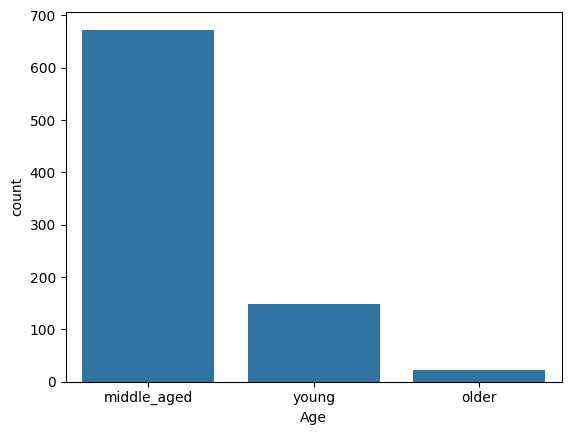

In [19]:
sns.barplot(df["Age"].value_counts())

In [20]:
# most of the people are middle aged

In [21]:
df["type_of_stress"].unique()

array(['Eustress (Positive Stress) - Stress that motivates and enhances performance.',
       'No Stress - Currently experiencing minimal to no stress.',
       'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.'],
      dtype=object)

In [22]:
df["type_of_stress"]=df["type_of_stress"].apply(lambda x:0 if x=="No Stress - Currently experiencing minimal to no stress." else 1 if x=="Eustress (Positive Stress) - Stress that motivates and enhances performance." else 2)

In [23]:
df["type_of_stress"].value_counts()

type_of_stress
1    768
0     43
2     32
Name: count, dtype: int64

([0, 1, 2], [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

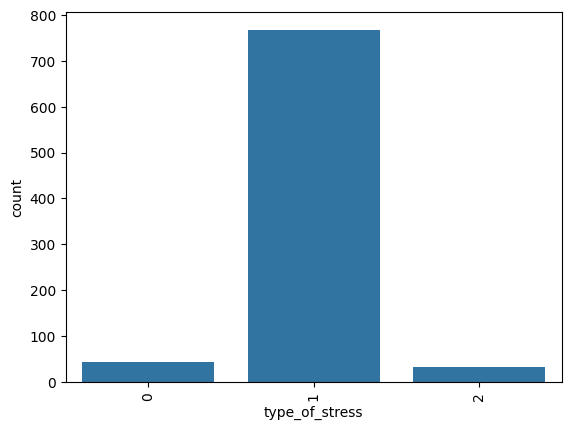

In [24]:
sns.barplot(df["type_of_stress"].value_counts())
plt.xticks(rotation=90)

In [25]:
# most of the people are  facing positive stress

In [26]:
df["Gender"].unique()

array([0, 1], dtype=int64)

In [27]:
df["Gender"].value_counts()

Gender
0    548
1    295
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

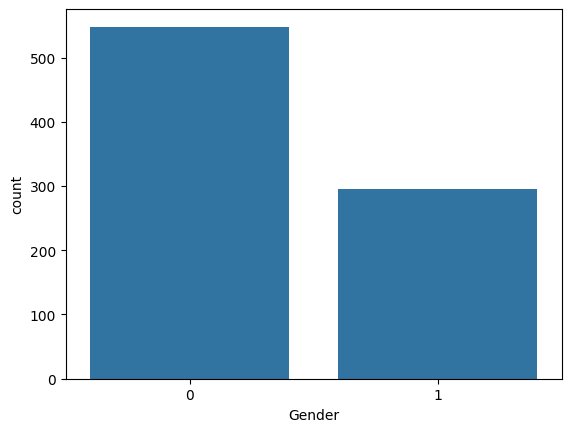

In [28]:
sns.barplot(df["Gender"].value_counts())

In [29]:
# most of the people are male

### Bivariate analysis

In [30]:
# checking if there is any reln betn Gender and type_of_stress
#chi square test
f=pd.crosstab(df["Gender"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(f)

In [31]:
p

0.20042070081058708

In [32]:
# greater than 5% so they are independent on each other

In [33]:
# checking if there id any reln betn Age and type of stress
g=pd.crosstab(df["Age"],df["type_of_stress"])

In [34]:
chi2,p,expected,dof=stats.chi2_contingency(g)

In [35]:
p

0.05050350038354324

In [36]:
# greater than 5% so they are independent on each other

In [37]:
# checking if there is any reln betn exp_stress and type_of_stress
h=pd.crosstab(df["exp_stress"],df["type_of_stress"])

In [38]:
chi2,p,expected,dof=stats.chi2_contingency(h)

In [39]:
p

2.8238012470508265e-08

In [40]:
# less than 5% so there is a reln bet exp_stress and type_of_stress

In [41]:
# checking if there is any reln betn heartbeat and type_of_stress
o=pd.crosstab(df["heartbeat"],df["type_of_stress"])

In [42]:
chi2,p,expected,dof=stats.chi2_contingency(o)

In [43]:
p

1.525693472404838e-21

In [44]:
# less than 5% so they are dependent on each other

In [45]:
# checking if there is any reln betn tension and type_of_stress
k=pd.crosstab(df["tension"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(k)

In [46]:
p

1.8816358821129607e-15

In [47]:
# less than 5% so they are dependent on each other

In [48]:
# checking if there is any reln betn sleep_problems and type_of_stress
e=pd.crosstab(df["sleep_problems"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(e)

In [49]:
p

1.296267702190033e-15

In [50]:
# less than 5% so they are dependent on each other

In [51]:
# checking if there is any reln betn headaches and type_of_stress
a=pd.crosstab(df["headaches"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(a)

In [52]:
# less than 5% so they are dependent on each other

In [53]:
# checking if there is any reln betn irritation and type_of_stress
q=pd.crosstab(df["irritation"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(q)

In [54]:
p

2.6688300706744595e-18

In [55]:
#less than 5% so they are dependent on each other

In [56]:
# checking if there is any reln betn academic_stress and type_of_stress
u=pd.crosstab(df["academic_stress"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(u)

In [57]:
p

2.134787720788633e-12

In [58]:
# less than 5% so they are dependent on each other

In [59]:
# checking if there is any reln betn sadness and type_of_stress
w=pd.crosstab(df["sadness"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(w)

In [60]:
p

1.541759884723028e-15

In [61]:
# less than 5% so they are dependent on each other

In [62]:
# checking if there is any reln betn illness and type_of_stress
r=pd.crosstab(df["illness"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(r)

In [63]:
p

4.450159452227206e-14

In [64]:
# less than 5% so they are dependent on each other

In [65]:
# checking if there is any reln betn ifeel_lonely? and type_of_stress
z=pd.crosstab(df["feel_lonely?"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(z)

In [66]:
p

1.624408641256378e-11

In [67]:
# less than 5% so they are dependent on each other

In [68]:
# checking if there is any reln betn competetion_with_peers? and type_of_stress
j=pd.crosstab(df["competetion_with_peers?"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(j)

In [69]:
p

4.025446680948379e-11

In [70]:
# less than 5% so they are dependent on each other

In [71]:
# checking if there is any reln betn stress_of_relationship and type_of_stress
b=pd.crosstab(df["stress_of_relationship"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(b)

In [72]:
p

2.2745498878257238e-08

In [73]:
# less than 5% so they are deendent on each other

In [74]:
# checking if there is any reln betn difficulty_with_teachers and type_of_stress
v=pd.crosstab(df["difficulty_with_teachers"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(v)

In [75]:
p

1.154669614552334e-06

In [76]:
# less than 5% so they are dependent on each other

In [77]:
# checking if there is any reln betn stressed_of_working_env and type_of_stress
n=pd.crosstab(df["stressed_of_working_env"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(n)

In [78]:
p

2.0669147838435153e-17

In [79]:
# less than 5% so they are dependent on each other

In [80]:
# checking if there is any reln betn full_day_work and type_of_stress
m=pd.crosstab(df["full_day_work"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(m)

In [81]:
p

3.1469186788890464e-14

In [82]:
# less than 5% so they are dependent on each other

In [83]:
# checking if there is any reln betn stressed_of_home_env and type_of_stress
i=pd.crosstab(df["stressed_of_home_env"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(i)

In [84]:
p

2.1168697037877513e-09

In [85]:
# less than 5% so they are dependent on each other

In [86]:
# checking if there is any reln betn lack_confidence_in_academic_performance and type_of_stress
s=pd.crosstab(df["lack_confidence_in_academic_performance"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(s)

In [87]:
p

8.334103662772665e-13

In [88]:
# less than 5% so they are dependent on each other

In [89]:
# checking if there is any reln betn lack_confidence_in_academic_sunjects and type_of_stress
c=pd.crosstab(df["lack_confidence_in_academic_sunjects"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(c)

In [90]:
p

6.713038388468924e-12

In [91]:
# less than 5% so they are dependent on each other

In [92]:
# checking if there is any reln betn problems_in_extracurricular_activities and type_of_stress
d=pd.crosstab(df["problems_in_extracurricular_activities"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(d)

In [93]:
p

3.2372982629880904e-13

In [94]:
# checking if there is any reln betn attend_classes_regularly and type_of_stress
p=pd.crosstab(df["attend_classes_regularly"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(p)

In [95]:
p

4.510657593327353e-09

In [96]:
# less than 5% so they are dependent on each other

In [97]:
# checking if there is any reln betn gained_or_loss_weight and type_of_stress
t=pd.crosstab(df["gained_or_loss_weight"],df["type_of_stress"])
chi2,p,expected,dof=stats.chi2_contingency(t)

In [98]:
p

3.4688907786914165e-12

In [99]:
# less than 5% so they are dependent on each other

### Multivariate analysis

In [100]:
df["Age"]=df["Age"].apply(lambda x:0 if x=="young" else 1 if x=="middle_aged" else 2)

In [101]:
df1=df.copy()

<Axes: >

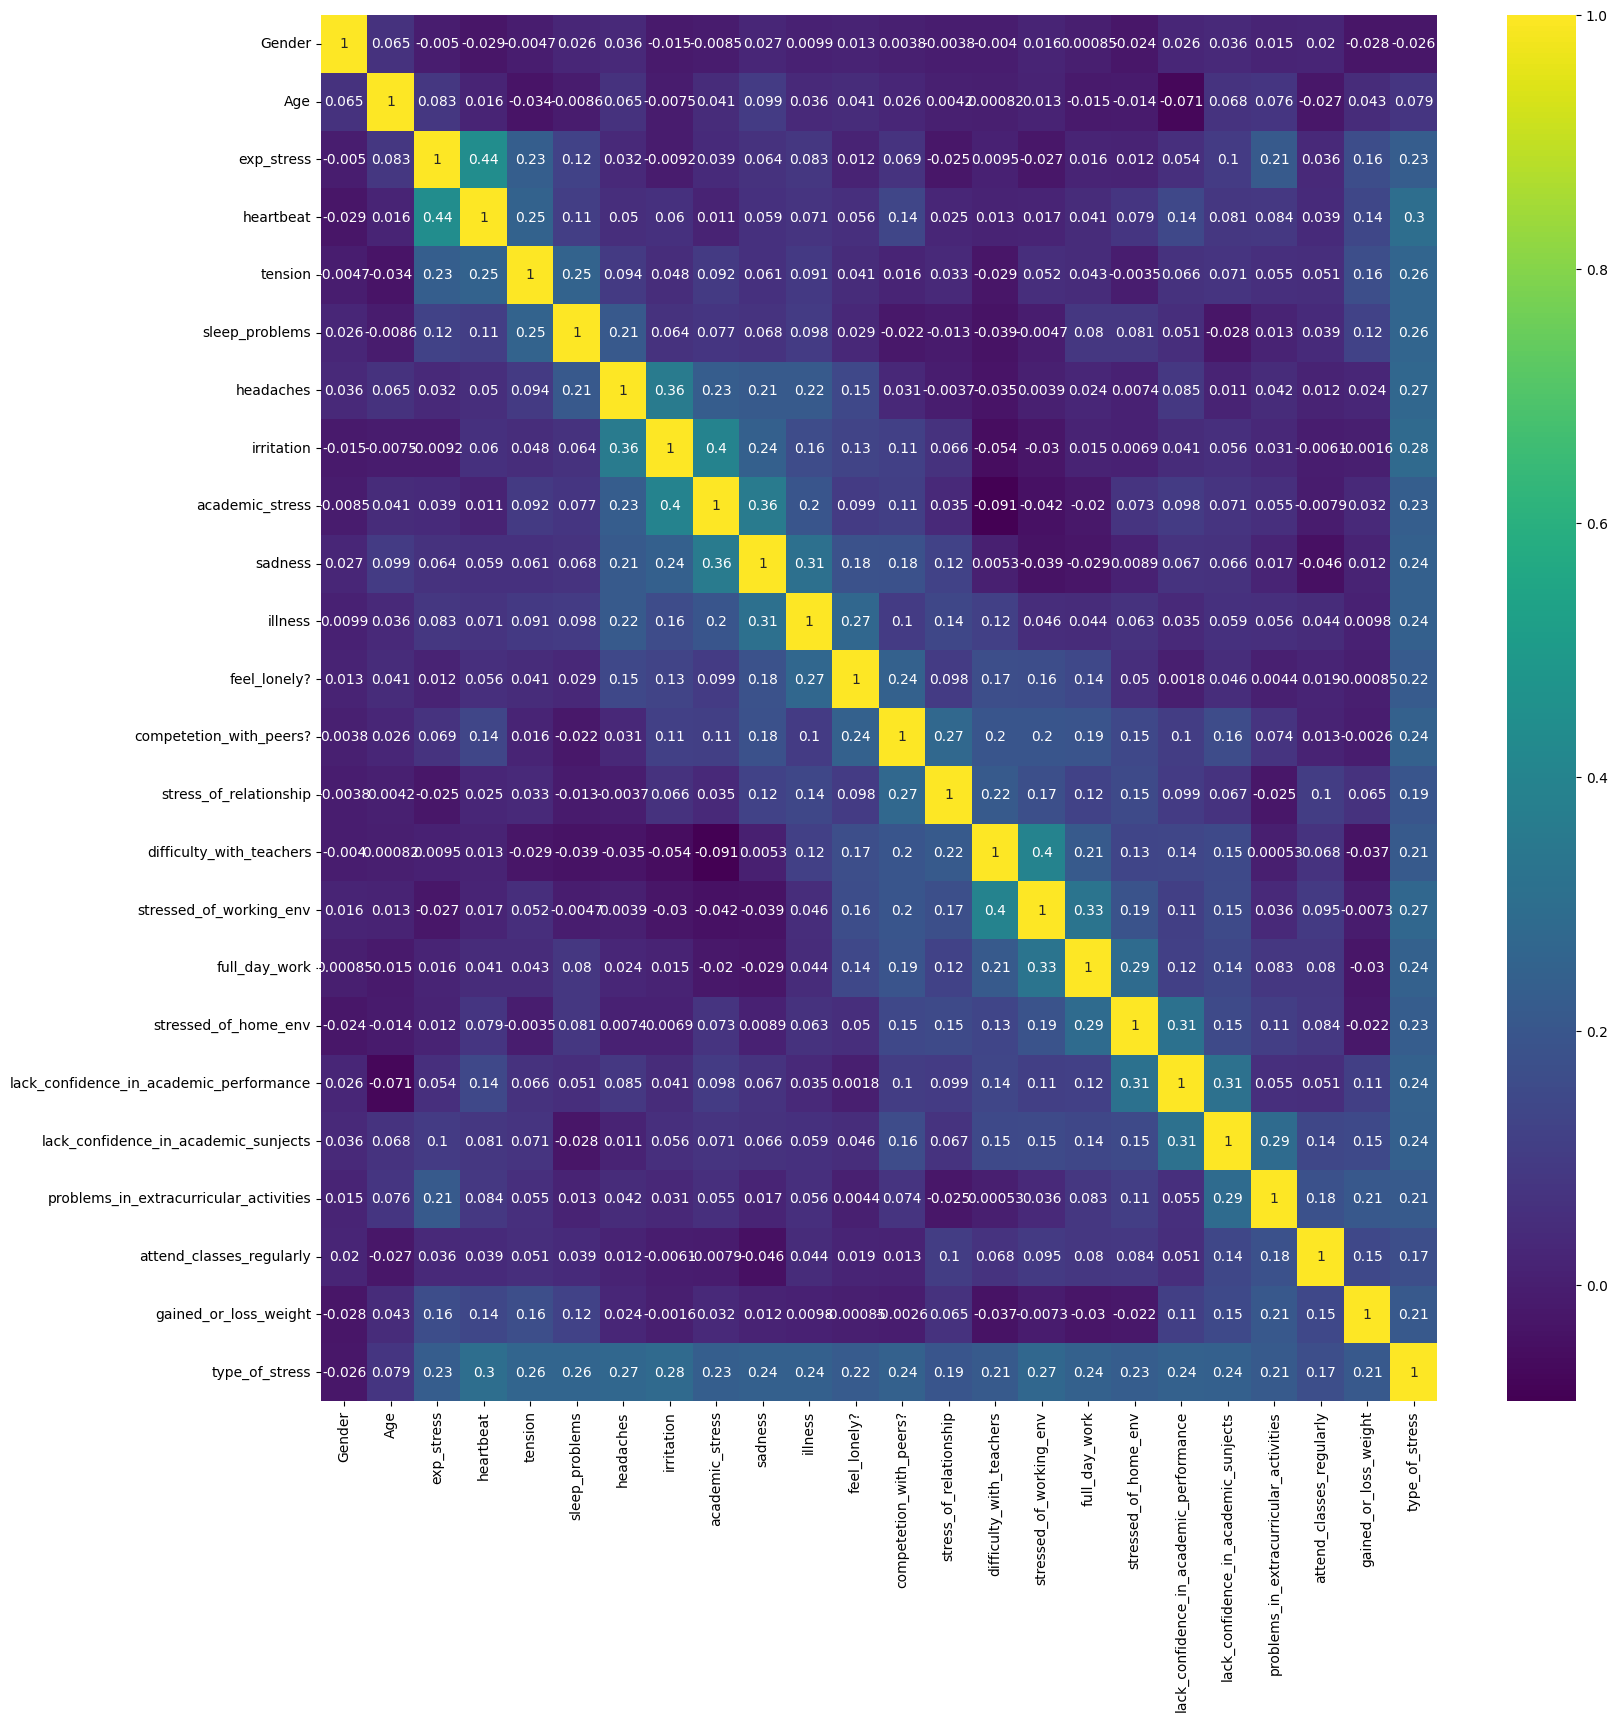

In [102]:
# heatmap
plt.figure(figsize=(18,18))
sns.heatmap(df1.corr(),annot=True,cmap="viridis")

In [103]:
# most of the columns are correlated to target column,whereas most correlated is heartbeat 

In [104]:
#pca
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [105]:
scaled=sc.fit_transform(df1)

In [106]:
scaled

array([[-0.73370373,  0.35296195,  0.0020922 , ..., -1.87930103,
        -0.35848857,  0.04378892],
       [-0.73370373,  0.35296195, -0.87976872, ...,  0.61689241,
        -0.35848857,  0.04378892],
       [-0.73370373,  0.35296195,  1.76581404, ..., -1.04723655,
        -1.25791079,  0.04378892],
       ...,
       [ 1.36294795,  0.35296195,  0.88395312, ...,  1.44895689,
         0.54093365,  0.04378892],
       [-0.73370373,  0.35296195,  1.76581404, ...,  1.44895689,
        -1.25791079,  0.04378892],
       [-0.73370373,  0.35296195,  0.88395312, ...,  1.44895689,
         1.44035587,  0.04378892]])

In [107]:
from sklearn.decomposition import PCA

In [108]:
pca=PCA(n_components=2)

In [109]:
pca_data=pca.fit_transform(scaled)

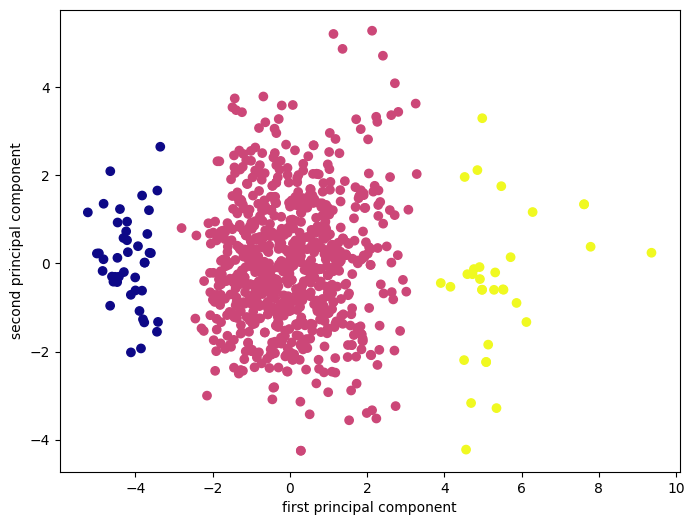

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=df1["type_of_stress"],cmap="plasma")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [111]:
#t-sne

In [112]:
from sklearn.manifold import TSNE

In [113]:
tsne=TSNE(n_components=2)

In [114]:
tsne_data=tsne.fit_transform(df1)

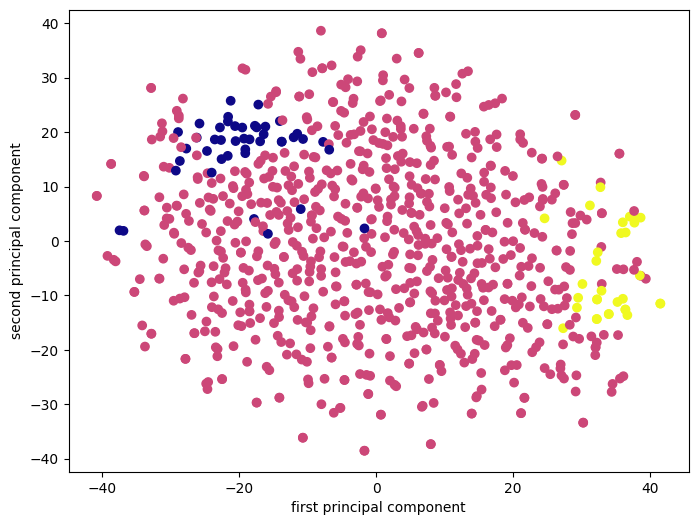

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_data[:,0],tsne_data[:,1],c=df1["type_of_stress"],cmap="plasma")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [116]:
# feature selection

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
x=df1.drop(columns=["type_of_stress"])
y=df1["type_of_stress"]

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [121]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_new_train=sc.fit_transform(xtrain)
x_new_test=sc.fit_transform(xtest)

In [122]:
x_new_train=pd.DataFrame(x_new_train,columns=xtrain.columns)
x_new_test=pd.DataFrame(x_new_test,columns=xtrain.columns)

In [123]:
knn=KNeighborsClassifier(n_neighbors=5)

In [124]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs=SequentialFeatureSelector(knn,n_features_to_select=5,scoring="accuracy",direction="forward",cv=5)

In [125]:
sfs

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=5, scoring='accuracy')

In [126]:
sfs.fit(x_new_train,ytrain)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=5, scoring='accuracy')

In [127]:
indices_features=sfs.get_support(indices=True)

In [128]:
lst=[]
for i in indices_features:
    lst.append(df1.columns[i])

In [129]:
lst

['Gender',
 'Age',
 'sleep_problems',
 'feel_lonely?',
 'lack_confidence_in_academic_performance']

In [130]:
# after applying feature selection these are the columns which effect the target column

### Applying Algorithms

In [131]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [132]:
lr=LogisticRegression(multi_class="multinomial",solver="lbfgs")

In [133]:
lr.fit(xtrain,ytrain)

C:\Users\pc\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\pc\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [134]:
lr.score(xtest,ytest)

0.9704142011834319

In [135]:
# getting 97 % accuray after applying logistic regression

In [136]:
# applying knn
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [137]:
knn.score(xtest,ytest)

0.9408284023668639

In [138]:
# getting 94% accuracy after applying knn

In [139]:
# applying svm
from sklearn.svm import SVC
svc=SVC()

In [140]:
svc.fit(xtrain,ytrain)

SVC()

In [141]:
svc.score(xtest,ytest)

0.9644970414201184

In [142]:
# getting 94% accuracy after applying svc

In [143]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [144]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [145]:
dt.score(xtest,ytest)

0.9053254437869822

In [146]:
# getting 90% accuracy after applying decision tree classifier

In [147]:
# applying gridsearchcv
from sklearn.model_selection import GridSearchCV
gr=GridSearchCV(estimator=svc,param_grid={'kernel':['linear','poly','rbf','sigmoid']},scoring='accuracy',cv=5)

In [148]:
gr.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [149]:
gr.best_params_

{'kernel': 'poly'}

In [150]:
gr.best_score_

0.9629187396351575

In [151]:
# after doing hyperparameter on svc getting 96% accuracy

In [152]:
# applying randomforest
from sklearn.ensemble import RandomForestClassifier

In [153]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [154]:
rf.score(xtest,ytest)

0.9408284023668639

In [155]:
# Bagging
mod=[SVC(),
    DecisionTreeClassifier(),
    LogisticRegression()]

In [156]:
trained_model=[]
for i in mod:
    b=i.fit(xtrain,ytrain)
    trained_model.append(b)

C:\Users\pc\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [157]:
trained_model

[SVC(), DecisionTreeClassifier(), LogisticRegression()]

In [158]:
d=[]
for i in trained_model:
    f=i.score(xtest,ytest)
    d.append(f)

In [159]:
d

[0.9644970414201184, 0.8994082840236687, 0.9704142011834319]

In [164]:
# so the majority value is 97%  

In [179]:
# Stacking
from sklearn.ensemble import StackingClassifier
estimators=[("svc",svc),
           ("dt",DecisionTreeClassifier()),
           ("knn",KNeighborsClassifier())]
stack=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(multi_class="multinomial",solver="lbfgs"))

In [180]:
stack.fit(xtrain,ytrain)

C:\Users\pc\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


StackingClassifier(estimators=[('svc', SVC()), ('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression(multi_class='multinomial'))

In [182]:
stack.score(xtest,ytest)

0.9644970414201184

In [183]:
# getting 94% accuracy after applying bagging

In [184]:
#cascading 
from sklearn.multioutput import ClassifierChain
base_clf=DecisionTreeClassifier()
chain=ClassifierChain(base_clf)
Ytrain=pd.DataFrame(ytrain)

In [186]:
chain.fit(xtrain,Ytrain)

ClassifierChain(base_estimator=DecisionTreeClassifier())

In [187]:
chain.score(xtest,ytest)

0.9112426035502958

In [188]:
# getting 91% accuracy after applying cascading